**Two more basic morphological transformations commonly used in image processing are:**

# **Opening**
    
Definition: Opening is the process of erosion followed by dilation.
    
Purpose: It helps remove small objects or noise from an image without significantly affecting the larger structures. It is especially useful for eliminating noise in the background.

# **means** first erosion take place then dilation

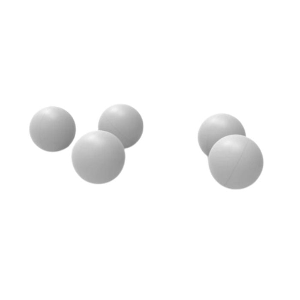

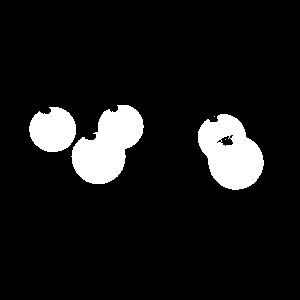

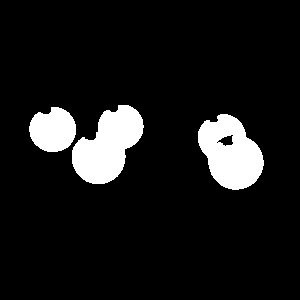

In [4]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab


# Assuming the uploaded image is named 'col_balls.jpg'
img = cv2.imread('/content/ball3.jpg', 0)  # Load in grayscale
# Resize the image to 300x300 pixels
img = cv2.resize(img, (300, 300))


# Apply binary threshold
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a 3x3 kernel full of ones
kernel = np.ones((3, 3), np.uint8)

# Perform the opening operation (erosion followed by dilation)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Display the images
cv2_imshow(img)         # Original Image
cv2_imshow(mask)        # Binary Mask
cv2_imshow(opening)     # Result of Opening


# **Closing**

Definition: Closing is the reverse of opening, involving dilation followed by erosion.

Purpose: Closing fills small holes or gaps within objects and joins narrow breaks or gaps in contours.

It is opposite of opening

closing is just another name of dilation followed by erosion.

means first dilation take place then erosion-


**kernel (also called a structuring element) is essentially a small matrix or grid that defines the shape and size of the neighborhood over which the morphological operation is applied.**

MORPH_TOPHAT: Difference between the input image and its opening result.

MORPH_GRADIENT: Difference between the dilation and erosion of the image, highlighting edges.

MORPH_BLACKHAT: Difference between the input image and its closing result, useful for finding dark regions on a light background.



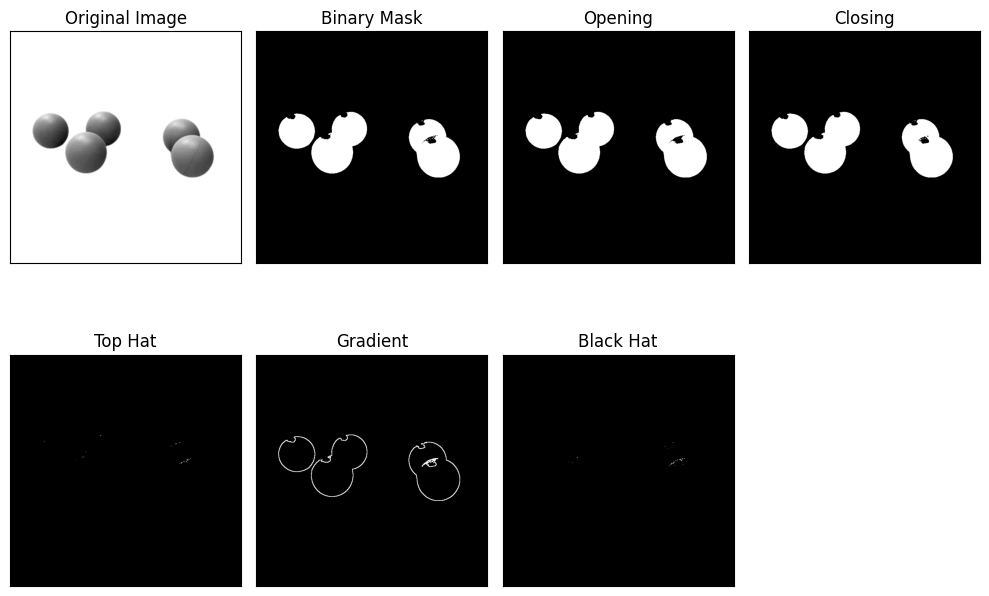

In [7]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For displaying intermediate results

# Load the image in grayscale
img = cv2.imread('/content/ball3.jpg', 0)  # Replace with your image filename

# Threshold to create a binary mask
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a 3x3 kernel of ones
kernel = np.ones((3, 3), np.uint8)

# Apply the Opening and Closing operations
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Optional: Additional Morphological Transformations
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
blackhat = cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel)

# Plot the images using matplotlib
titles = ["Original Image", "Binary Mask", "Opening", "Closing", "Top Hat", "Gradient", "Black Hat"]
images = [img, mask, opening, closing, tophat, gradient, blackhat]

plt.figure(figsize=(10, 7))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# **Example with all morphological operations**

Saving ball3.jpg to ball3 (3).jpg


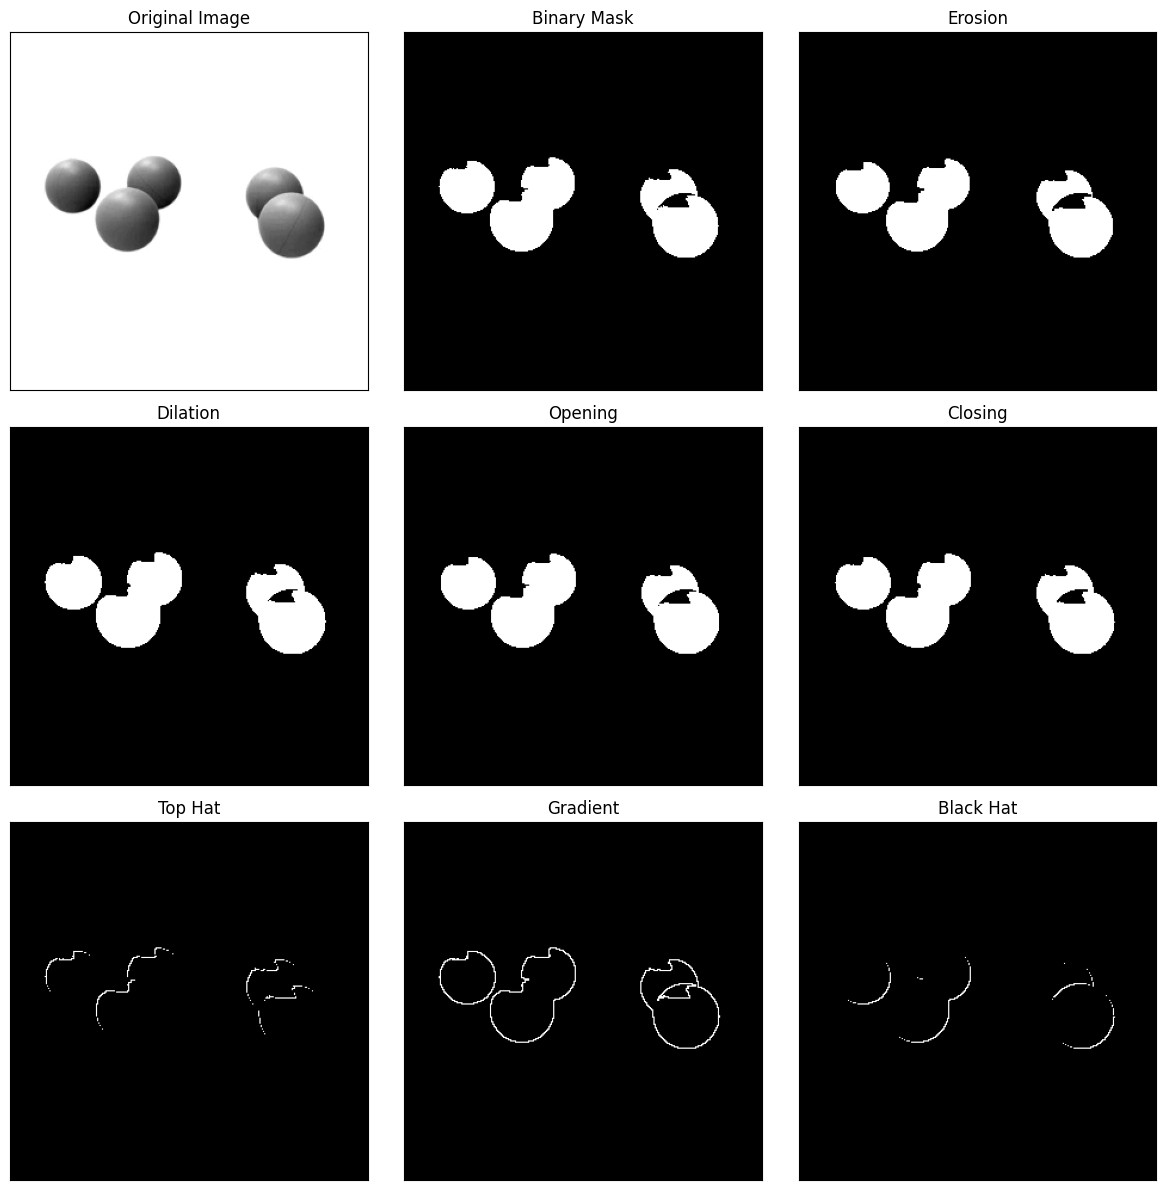

In [8]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For individual image display in Colab

# Upload the image file
from google.colab import files
uploaded = files.upload()

# Load the image in grayscale
#img = cv2.imread('girl.jpg', 0)  # Replace 'girl.jpg' with the name of the uploaded file

# Resize the image to 300x300 pixels
img = cv2.resize(img, (300, 300))

# Apply binary thresholding to create a mask
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

# Define a 2x2 kernel with ones
kernel = np.ones((2, 2), np.uint8)

# Apply various morphological operations
e = cv2.erode(mask, kernel)                          # Erosion
d = cv2.dilate(mask, kernel)                         # Dilation
o = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Opening
c = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Closing
x1 = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)     # Top Hat
x2 = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)   # Gradient
x3 = cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel)   # Black Hat

# Titles and images for display
titles = ['Original Image', 'Binary Mask', 'Erosion', 'Dilation', 'Opening', 'Closing',
          'Top Hat', 'Gradient', 'Black Hat']
images = [img, mask, e, d, o, c, x1, x2, x3]

# Display all images in a grid using matplotlib
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
